In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Write diff equations and derivation here

The equations are written as functions. For the time stepsize a value of $\Delta t = 0.005$ is chosen. 

In [2]:
def pk1(pk, qk, K):
    p = (Dp*(pk[2,1]+pk[0,1]+pk[1,2]+pk[1,0]-4*pk[1,1])+pk[1,1]**2*qk+C-(K+1)*pk[1,1])*0.005+pk[1,1]
    return p

def qk1(qk, pk, K):
    q = (Dq*(qk[2,1]+qk[0,1]+qk[1,2]+qk[1,0]-4*qk[1,1])-pk**2*qk[1,1]+K*pk)*0.005+qk[1,1]
    return q

A function is written to update the squares using discrete forward Euler. To descretize the Neumann boundary conditions a frame of ghost nodes is added around both squares making them 42x42 instead of 40x40. For this reason the Euler updater only loops from 1 to l-1 and never updates the layer of ghost nodes. 

In [3]:
def euler_updater(pmat, qmat, K):
    l = len(pmat)
    new_pmat = np.zeros((l,l))
    new_qmat = np.zeros((l,l))
    
    for i in range(1, l-1):
        for j in range(1, l-1):
            new_pmat[i,j] = pk1(pmat[i-1:i+2, j-1:j+2],qmat[i,j], K)
            new_qmat[i,j] = qk1(qmat[i-1:i+2, j-1:j+2],pmat[i,j], K)
    
    return new_pmat, new_qmat

Defining function to initialize the p and q squares using the initial conditions of \n $p(x,y,0)=C+0.1$ for $10<x<30, 10<y<30$ and \n 
$q(x,y,0)=(K/C)+0.2$ for $10<x<30, 10<y<30$.

In [4]:
Dp = 1
Dq = 8
C = 4.5

def initialize(K):
    p = np.zeros((42,42))
    q = np.zeros((42,42))
    p[11:31, 11:31] = C+0.1
    q[11:31, 11:31] = K/C+0.2
    
    return p, q

Define function to initialize and update solution squares to t=2000 and plot for a given K. 

In [6]:
def update_and_plot(K):
    p, q = initialize(K)
    for i in range(2000):
        p,q = euler_updater(p,q,K)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)

    im1 = ax1.imshow(p)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    ax1.set_title('p for t=2000')

    im2 = ax2.imshow(q)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    ax2.set_title('q for t=2000')

    for ax in fig.get_axes():
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    fig.suptitle('K = '+str(K), y=0.85)
    fig.tight_layout(pad=0.5)

Initializing, updating and plotting for the 6 values of K. 

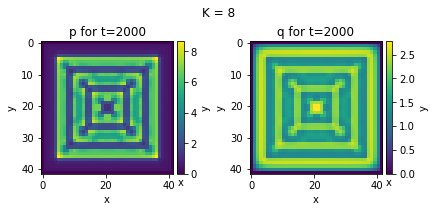

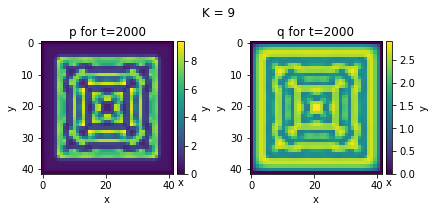

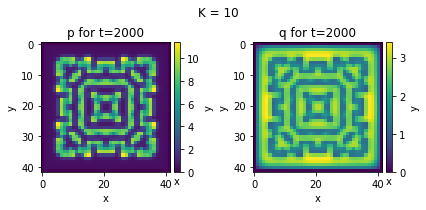

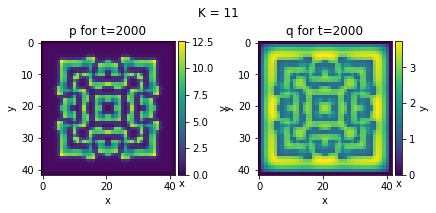

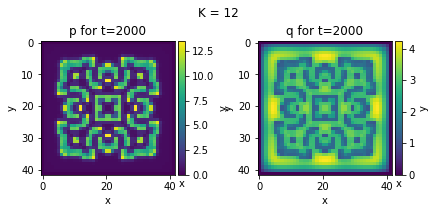

In [8]:
Ks = [7,8,9,10,11,12]
for K in Ks:
    update_and_plot(K)